In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
tk = th.Thicket.from_caliperreader(glob("cali_files/mpi_65536/*4.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis=1)#,"Avg time/rank", "Min time/rank", "Max time/rank", "Total time", "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              2342110          4.212500   
                                                  82291199         0.023629   
                                                  195196800        6.760443   
                                                  227777375        4.318882   
                                                  361535192        2.653075   
                                                  363538087        0.526455   
                                                  637629214        1.419685   
                                                  640297378        0.405745   
                                                  677204859        0.237607   
                                                  989128456        0.377487   
                                                  1034699123       0.511770   
                                                  1181208828       6.474376   
                                                  1431296090       0.026257   
                                                  1435596204       5.238112   
                                                  1462860775       5.901956   
                                                  1625079858       0.012076   
                                                  1633612743       0.761138   
                                                  1742328071       1.365311   
                                                  1876818237       1.436543   
                                                  2008858479       1.430752   
                                                  2183203268       0.050019   
                                                  2455395461       0.515887   
                                                  2484000489       4.279811   
                                                  2676406270       0.824322   
                                                  2782071441       0.514849   
                                                  2864545658       4.631151   
                                                  2945875440       2.744430   
                                                  3008800229       0.019567   
                                                  3051292487       0.493464   
                                                  3228339834       3.173685   
                                                  3257585205       3.376396   
                                                  3404113562       3.507703   
                                                  3500418344       0.011015   
                                                  3786284182       0.929428   
                                                  3817524527       0.622703   
                                                  3867167727       1.359504   
                                                  3904550185       4.651900   
                                                  3966063907       0.370311   
                                                  4208175528       3.350628   
                                                  4239156876       0.744076   
{'name': 'comm', 'type': 'function'}              2342110               NaN   
                                                  82291199         0.021636   
                                                  195196800             NaN   
                                                  227777375        0.175033   
                                                  361535192        0.022565   
                                                  363538087             NaN   
                                                  637629214        0.056993   
                                                  640297378        0.018700   
                                                  677204859        0.236067   
                                 

In [3]:
tk.metadata.columns

Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:time.variance', 'launchdate', 'libraries', 'cmdline', 'cluster',
       'Algorithm', 'ProgrammingModel', 'Datatype', 'SizeOfDatatype',
       'InputSize', 'InputType', 'num_procs', 'group_num',
       'implementation_source', 'data_init', 'comm', 'comp', 'comm_large',
       'comp_large', 'comp_small', 'correctness_check', 'MPI_Barrier',
       'MPI_Isend', 'main', 'comm_small', 'data_init_time', 'mpi_barrier',
       'mpi_scatter', 'mpi_gather'],
      dtype='object')

In [4]:
gb = tk.groupby("Algorithm")

4  thickets created...
{'BitonicSort': <thicket.thicket.Thicket object at 0x2b8302d61280>, 'MergeSort': <thicket.thicket.Thicket object at 0x2b8302d7c490>, 'RadixSort': <thicket.thicket.Thicket object at 0x2b8302c99f40>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2b8302d4bd00>}


In [5]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [6]:
ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

<ipython-input-6-9c519a2558e5>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)


In [7]:
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
input_sizes = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))

In [8]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
   # plt.xscale("log", base=2)
    plt.xticks(num_threads)
    plt.show()
    return fig, ax

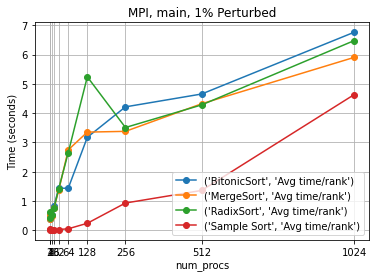

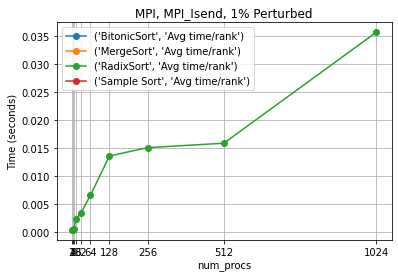

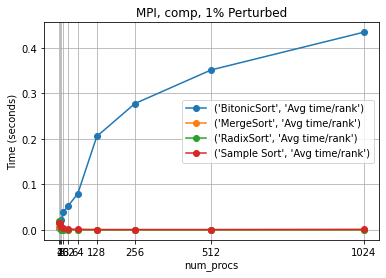

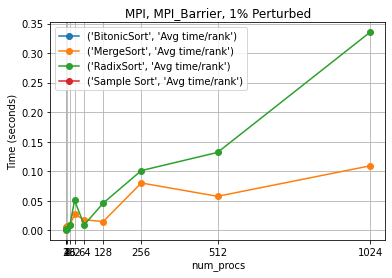

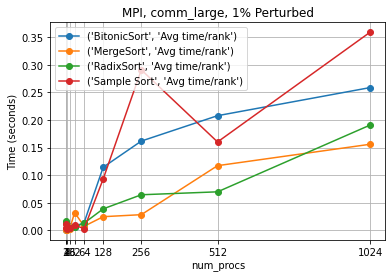

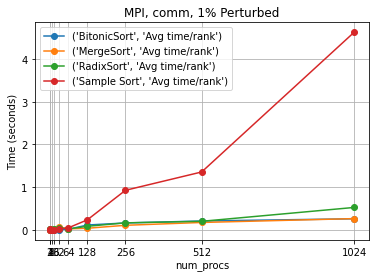

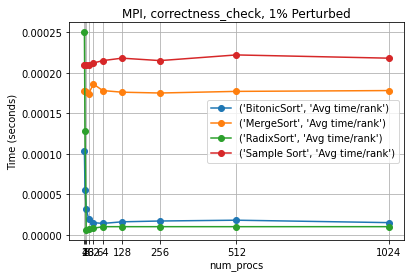

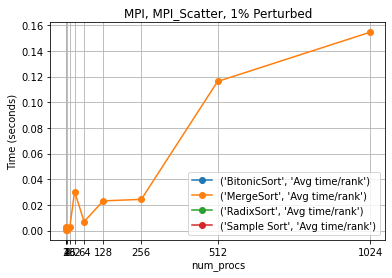

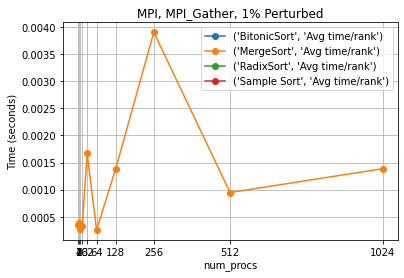

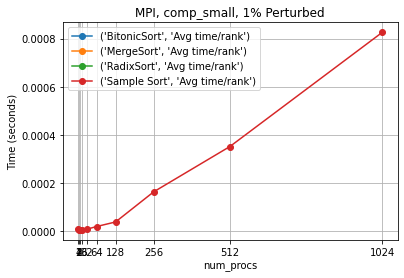

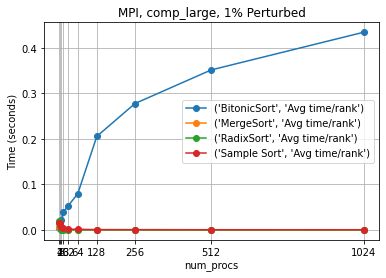

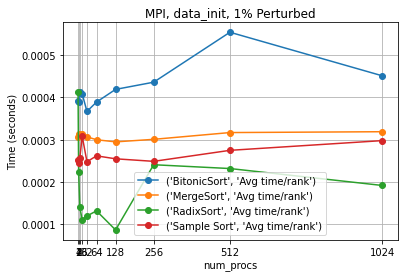

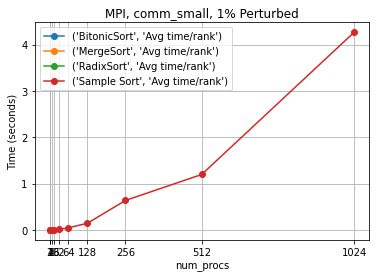

In [9]:
for name in function_names:
    # for size in input_sizes:
        plot_mpl(
            df=ctk.dataframe.loc[name],
            title=f"MPI, {name}, 1% Perturbed", 
            xlabel="num_procs",
            ylabel="Time (seconds)",
        )